In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
#import library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def standardize(df):
  df = (df - df.mean())/df.std()
  return df

**分析不同K值準確度**

In [30]:
#KNN
import pandas as pd
import math as mt

def knn(train_data, test_data, k):
    predictions = []
    for index, test_instance in test_data.iterrows():
        distances = []
        for _, train_instance in train_data.iterrows():
          #在算距離時，這個部分必須先確保test_dataset與train_dataset的特徵欄位順序一致
            dist = mt.sqrt((test_instance[0] - train_instance[0])**2 +
                           (test_instance[1] - train_instance[1])**2 +
                           (test_instance[2] - train_instance[2])**2 +
                           (test_instance[3] - train_instance[3])**2 +
                           (test_instance[4] - train_instance[4])**2 +
                           (test_instance[5] - train_instance[5])**2 +
                           (test_instance[6] - train_instance[6])**2 +
                           (test_instance[7] - train_instance[7])**2)
            distances.append((dist, train_instance['Outcome']))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k] #取前k小的距離

        votes = {'0': 0, '1': 0}
        for _, outcome in neighbors:
            votes[str(int(outcome))] += 1

        predicted_class = max(votes, key=votes.get)
        predictions.append(int(predicted_class))

    return predictions

# Demo
train_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2
k = 15

print(train_data)
predictions = knn(train_data, test_data, k)
true_outcome = outcome2
# Calculate accuracy manually
correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
total_predictions = len(true_outcome)
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)




     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.645927  0.852292       0.164486       0.924461 -0.684608  0.210309   
1      -0.841646 -1.072639      -0.145532       0.541156 -0.684608 -0.655670   
2       1.240956  1.921698      -0.248871      -1.311484 -0.684608 -1.063917   
3      -0.841646 -0.950421      -0.145532       0.157851  0.125486 -0.470103   
4      -1.139160  0.516193      -1.488942       0.924461  0.763219  1.385567   
..           ...       ...            ...            ...       ...       ...   
562    -0.841646 -1.011530      -0.042192       0.860577 -0.021021  0.705155   
563     0.645927 -0.644877      -0.455549      -0.097685 -0.219235 -0.618557   
564    -1.139160 -0.889313       0.577843      -1.311484 -0.684608  0.061856   
565    -0.544131 -0.767095      -0.765567      -0.417106  0.073777 -0.717526   
566    -0.841646 -0.644877       0.164486       0.605040 -0.529483  0.828866   

     DiabetesPedigreeFunction       Age

567
     k  accuracy
0    1  0.716418
1    3  0.781095
2    5  0.761194
3    7  0.766169
4    9  0.761194
5   11  0.766169
6   13  0.761194
7   15  0.771144
8   17  0.786070
9   19  0.791045
10  21  0.800995


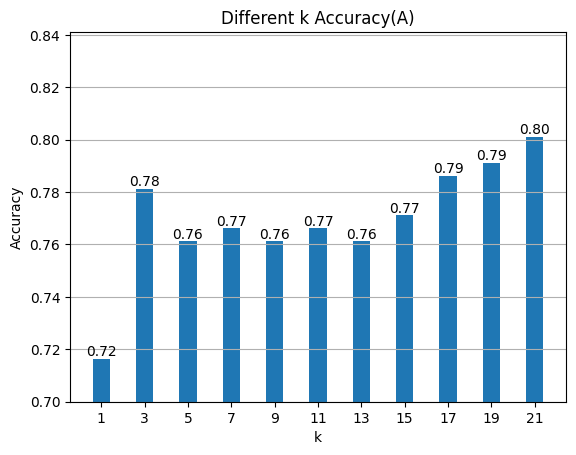

In [32]:
#A實驗
train_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2

print(train_data.shape[0])
k = int(mt.sqrt(len(train_data)))  # 將測試的K選擇在training dataset數開根號
accuracy_euil =[]
k_data = []

k_values = list(range(1, k, 2))

for k in k_values:
    predictions = knn(train_data, test_data, k)

    true_outcome = test_data['Outcome'].tolist()
    correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
    total_predictions = len(true_outcome)
    accuracy = correct_predictions / total_predictions
    accuracy_euil.append(accuracy)

accuracy_df_normal = pd.DataFrame({"k": k_values, "accuracy": accuracy_euil})#store k, accuracy
print(accuracy_df_normal)

# Plotting bar chart
plt.bar(accuracy_df_normal['k'], accuracy_df_normal['accuracy'])
plt.title('Different k Accuracy(A)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.ylim(0.7,)
plt.xticks(accuracy_df_normal['k'])
for i in range(len(accuracy_df_normal)):
    plt.text(accuracy_df_normal['k'][i], accuracy_df_normal['accuracy'][i], f"{accuracy_df_normal['accuracy'][i]:.2f}", ha='center', va='bottom')
plt.show()

668
     k  accuracy
0    1      0.71
1    3      0.80
2    5      0.78
3    7      0.77
4    9      0.75
5   11      0.77
6   13      0.75
7   15      0.75
8   17      0.77
9   19      0.76
10  21      0.77
11  23      0.77


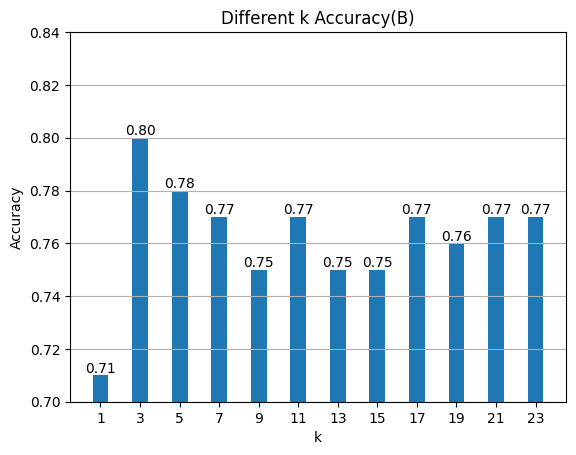

In [33]:
#B實驗
train_data = pd.read_csv("/content/drive/MyDrive/Data mining/b/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/b/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2

print(train_data.shape[0])
k = int(mt.sqrt(len(train_data)))  # 將測試的K選擇在training dataset數開根號
accuracy_euil =[]
k_data = []

k_values = list(range(1, k, 2))

for k in k_values:
    predictions = knn(train_data, test_data, k)

    true_outcome = test_data['Outcome'].tolist()
    correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
    total_predictions = len(true_outcome)
    accuracy = correct_predictions / total_predictions
    accuracy_euil.append(accuracy)

accuracy_df_normal = pd.DataFrame({"k": k_values, "accuracy": accuracy_euil})#store k, accuracy
print(accuracy_df_normal)

# Plotting bar chart
plt.bar(accuracy_df_normal['k'], accuracy_df_normal['accuracy'])
plt.title('Different k Accuracy(B)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.ylim(0.7,)
plt.xticks(accuracy_df_normal['k'])
for i in range(len(accuracy_df_normal)):
    plt.text(accuracy_df_normal['k'][i], accuracy_df_normal['accuracy'][i], f"{accuracy_df_normal['accuracy'][i]:.2f}", ha='center', va='bottom')
plt.show()

     k  accuracy
0    1  0.716418
1    3  0.781095
2    5  0.766169
3    7  0.746269
4    9  0.761194
5   11  0.766169
6   13  0.781095
7   15  0.786070
8   17  0.786070
9   19  0.781095
10  21  0.796020


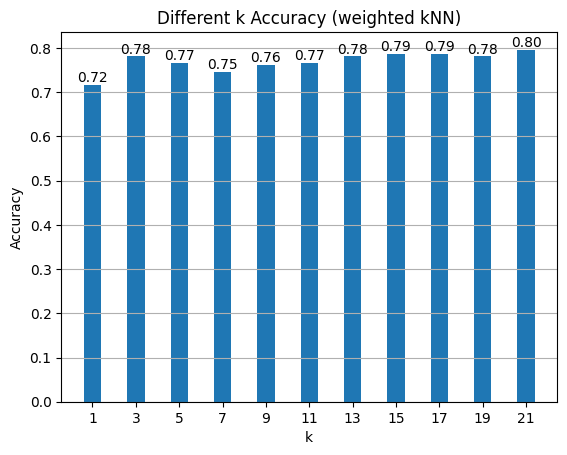

In [ ]:
#加權KNN(1):反函數
k = int(mt.sqrt(len(train_data)))
def knn_weighted(train_data, test_data, k):
    predictions = []
    for index, test_instance in test_data.iterrows():
        distances = []
        for _, train_instance in train_data.iterrows():
            dist = mt.sqrt((test_instance[0] - train_instance[0])**2 +
                           (test_instance[1] - train_instance[1])**2 +
                           (test_instance[2] - train_instance[2])**2 +
                           (test_instance[3] - train_instance[3])**2 +
                           (test_instance[4] - train_instance[4])**2 +
                           (test_instance[5] - train_instance[5])**2 +
                           (test_instance[6] - train_instance[6])**2 +
                           (test_instance[7] - train_instance[7])**2)
            distances.append((dist, train_instance['Outcome']))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]

        votes = {'0': 0, '1': 0}
        for dist, outcome in neighbors:
            votes[str(int(outcome))] += 1 / (dist + 10**(-10))#用反函數加權

        predicted_class = max(votes, key=votes.get)
        predictions.append(int(predicted_class))

    return predictions

train_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2

k_values = list(range(1, k, 2))
accuracy_values = []

for k in k_values:
    predictions = knn_weighted(train_data, test_data, k)

    true_outcome = test_data['Outcome'].tolist()

    correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
    total_predictions = len(true_outcome)
    accuracy = correct_predictions / total_predictions
    accuracy_values.append(accuracy)

accuracy_df_kw = pd.DataFrame({"k": k_values, "accuracy": accuracy_values})
print(accuracy_df_kw)
# Plotting
plt.bar(accuracy_df_kw['k'], accuracy_df_kw['accuracy'])
plt.title('Different k Accuracy (weighted kNN)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.autoscale()
plt.xticks(accuracy_df_kw['k'])
for i in range(len(accuracy_df_kw)):
    plt.text(accuracy_df_kw['k'][i], accuracy_df_kw['accuracy'][i], f"{accuracy_df_kw['accuracy'][i]:.2f}", ha='center', va='bottom')
plt.show()

     k  accuracy
0    1  0.731343
1    3  0.766169
2    5  0.756219
3    7  0.746269
4    9  0.751244
5   11  0.741294
6   13  0.746269
7   15  0.761194
8   17  0.776119
9   19  0.791045
10  21  0.796020


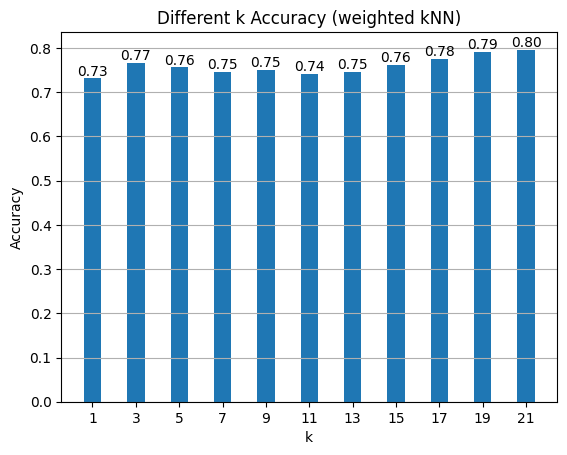

In [34]:
#此部分沒有放到報告上
#不同距離標準：曼哈頓距離（向量和）

def knn_manhattan(train_data, test_data, k):
    predictions = []
    for index, test_instance in test_data.iterrows():
        distances = []
        for _, train_instance in train_data.iterrows():
            dist = (abs(test_instance[0] - train_instance[0]) +
                    abs(test_instance[1] - train_instance[1]) +
                    abs(test_instance[2] - train_instance[2]) +
                    abs(test_instance[3] - train_instance[3]) +
                    abs(test_instance[4] - train_instance[4]) +
                    abs(test_instance[5] - train_instance[5]) +
                    abs(test_instance[6] - train_instance[6]) +
                    abs(test_instance[7] - train_instance[7]))
            distances.append((dist, train_instance['Outcome']))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]

        votes = {'0': 0, '1': 0}
        for _, outcome in neighbors:
            votes[str(int(outcome))] += 1 #無加權

        predicted_class = max(votes, key=votes.get)
        predictions.append(int(predicted_class))

    return predictions

#用A實驗

train_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2
k_values = list(range(1, k, 2))
accuracy_values = []

for k in k_values:
    predictions = knn_manhattan(train_data, test_data, k)

    true_outcome = test_data['Outcome'].tolist()
    correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
    total_predictions = len(true_outcome)
    accuracy = correct_predictions / total_predictions
    accuracy_values.append(accuracy)

accuracy_df_man = pd.DataFrame({"k": k_values, "accuracy": accuracy_values})
print(accuracy_df_man)
# Plotting
plt.bar(accuracy_df_man['k'], accuracy_df_man['accuracy'])
plt.title('Different k Accuracy (weighted kNN)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.xticks(accuracy_df_man['k'])
for i in range(len(accuracy_df_man)):
    plt.text(accuracy_df_man['k'][i], accuracy_df_man['accuracy'][i], f"{accuracy_df_man['accuracy'][i]:.2f}", ha='center', va='bottom')
plt.show()

     k  accuracy
0    1  0.716418
1    3  0.781095
2    5  0.761194
3    7  0.766169
4    9  0.761194
5   11  0.766169
6   13  0.761194
7   15  0.771144
8   17  0.786070
9   19  0.791045
10  21  0.800995


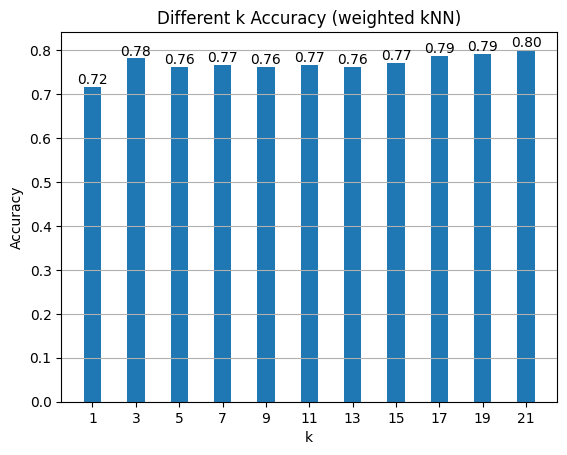

In [35]:
#權重2: 高斯函數
k = int(mt.sqrt(len(train_data)))
def knn_weighted(train_data, test_data, k, sigma):
    predictions = []
    for index, test_instance in test_data.iterrows():
        distances = []
        for _, train_instance in train_data.iterrows():
            dist = mt.sqrt((test_instance[0] - train_instance[0])**2 +
                           (test_instance[1] - train_instance[1])**2 +
                           (test_instance[2] - train_instance[2])**2 +
                           (test_instance[3] - train_instance[3])**2 +
                           (test_instance[4] - train_instance[4])**2 +
                           (test_instance[5] - train_instance[5])**2 +
                           (test_instance[6] - train_instance[6])**2 +
                           (test_instance[7] - train_instance[7])**2)
            weight = mt.exp(-dist**2 / (2 * (sigma**2)))
            distances.append((weight, train_instance['Outcome']))

        distances.sort(key=lambda x: x[0], reverse=True)
        neighbors = distances[:k]

        votes = {'0': 0, '1': 0}
        for weight, outcome in neighbors:
            votes[str(int(outcome))] += weight

        predicted_class = max(votes, key=votes.get)
        predictions.append(int(predicted_class))

    return predictions

train_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data mining/a/test_data.csv")
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
outcome = train_data['Outcome']
outcome2 = test_data['Outcome']
train_data = standardize(train_data[features])
train_data['Outcome'] = outcome
test_data = standardize(test_data[features])
test_data['Outcome'] = outcome2

k_values = list(range(1, k, 2))
accuracy_values = []

for k in k_values:
    predictions = knn_weighted(train_data, test_data, k, 9)

    true_outcome = test_data['Outcome'].tolist()

    correct_predictions = sum(1 for true, pred in zip(true_outcome, predictions) if true == pred)
    total_predictions = len(true_outcome)
    accuracy = correct_predictions / total_predictions
    accuracy_values.append(accuracy)

accuracy_df_kw = pd.DataFrame({"k": k_values, "accuracy": accuracy_values})
print(accuracy_df_kw)
# Plotting
plt.bar(accuracy_df_kw['k'], accuracy_df_kw['accuracy'])
plt.title('Different k Accuracy (weighted kNN)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.autoscale()
plt.xticks(accuracy_df_kw['k'])
for i in range(len(accuracy_df_kw)):
    plt.text(accuracy_df_kw['k'][i], accuracy_df_kw['accuracy'][i], f"{accuracy_df_kw['accuracy'][i]:.2f}", ha='center', va='bottom')
plt.show()